Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Target variable categories: ['yes', 'no']
Accuracy: 0.8195488721804511
Confusion matrix:
 [[606  78]
 [ 90 157]]
Classification report:
               precision    recall  f1-score   support

          no       0.87      0.89      0.88       684
         yes       0.67      0.64      0.65       247

    accuracy                           0.82       931
   macro avg       0.77      0.76      0.76       931
weighted avg       0.82      0.82      0.82       931



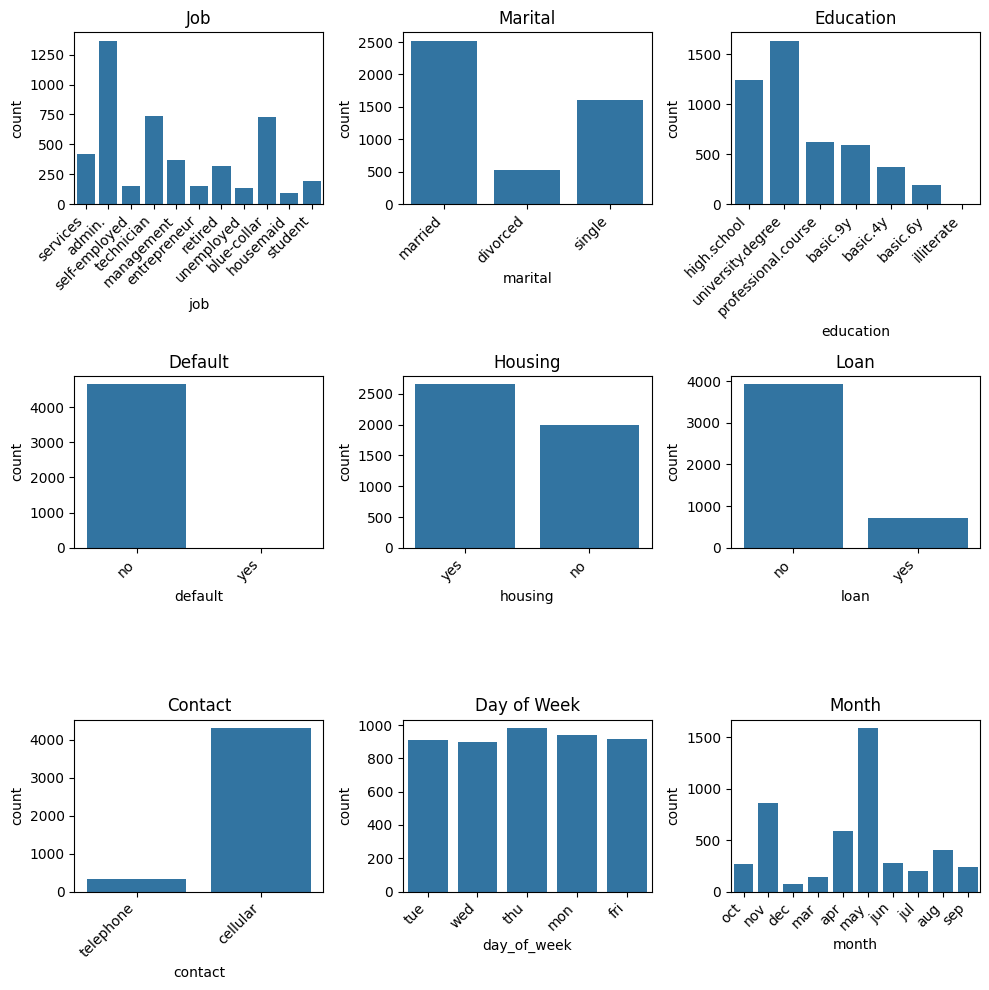

<Figure size 640x480 with 0 Axes>

In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

df.dropna()
# Replace 'unknown' with NaN
df.replace('unknown', pd.NA, inplace=True)
# Drop rows with NaN values in any column
df.dropna(inplace=True)
# Replace 'nonexistent' with NaN
df.replace('nonexistent', pd.NA, inplace=True)
# Drop rows with NaN values in any column
df.dropna(inplace=True)

# Split the data
X=df.drop(columns=['y'])
y=df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sample data
#categorical_columns = {'job': ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'management', 'entrepreneur', 'student', 'retired', 'unemployed'],
#        'marital': ['married', 'single', 'divorced'],
#        'education' : ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'illeterate'],
#        'default' : ['no'],
#        'housing' : ['no', 'yes'],
#        'loan' : ['no', 'yes'],
#        'contact' : ['telephone', 'cellular'],
#        'day_of_week' : ['mon', 'tue', 'wed', 'thu', 'fri'],
#        'month' : ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
#        'poutcome' : ['failure', 'success'],
#        'y' : ['yes', 'no']
#           }

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

#df['y_num'] = df['y'].replace({'yes': 1, 'no': 0})
categorical_columns_y = df['y'].unique().tolist()

# Print the identified columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)
print("Target variable categories:", categorical_columns_y)

# Create transformers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_columns),
        ('cat', cat_transformer, categorical_columns)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
#print("Predicted class labels:", predictions)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion matrix:\n", confusion_matrix(y_test, predictions))
print("Classification report:\n", classification_report(y_test, predictions))



# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

# Plot the data
sns.countplot(x="job", data=df, ax=ax1)
sns.countplot(x="marital", data=df, ax=ax2)
sns.countplot(x="education", data=df, ax=ax3)
sns.countplot(x="default", data=df, ax=ax4)
sns.countplot(x="housing", data=df, ax=ax5)
sns.countplot(x="loan", data=df, ax=ax6)
sns.countplot(x="contact", data=df, ax=ax7)
sns.countplot(x="day_of_week", data=df, ax=ax8)
sns.countplot(x="month", data=df, ax=ax9)

# Set y-axis label for the first plot
ax1.set_ylabel('count')
ax2.set_ylabel('count')
ax3.set_ylabel('count')
ax4.set_ylabel('count')
ax5.set_ylabel('count')
ax6.set_ylabel('count')
ax7.set_ylabel('count')
ax8.set_ylabel('count')
ax9.set_ylabel('count')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, horizontalalignment='right')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, horizontalalignment='right')
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, horizontalalignment='right')
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=45, horizontalalignment='right')
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=45, horizontalalignment='right')
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set the title for the first plot
ax1.set_title('Job')
ax2.set_title('Marital')
ax3.set_title('Education')
ax4.set_title('Default')
ax5.set_title('Housing')
ax6.set_title('Loan')
ax7.set_title('Contact')
ax8.set_title('Day of Week')
ax9.set_title('Month')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#Save the plot
plt.savefig('categorical_feature_count.png')


In [31]:
# Define parameter grid
param_grid = {'classifier__n_neighbors': range(1, 33, 2)}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', error_score='raise')

# Fit the model and time it
start_time = time.time()
grid_search.fit(X_train, y_train)
fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

# Get the best estimator
best_model = grid_search.best_estimator_

# Evaluate on training and test sets
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

print(fit_time)     #KNN=0.49;  LR = 0.14;  SVC = 0.82; DT = 0.35
print(train_score)  #KNN=0.82;   LR = 0.87;  SVC = 0.85; DT = 0.98
print(test_score)   #KNN=0.85;  LR = 0.86;  SVC = 0.86; DT = 0.94

0.49052396416664124
0.8280032249395324
0.8464017185821697
